#  Titanic Data Analysis

 Import all Packages

In [1]:
import tensorflow as tf
from keras.layers import Input, Dense,Activation,Dropout
from keras.models import Model
from keras import optimizers
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

Using TensorFlow backend.
c:\users\nirad\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Using Pandas, read the training set and Test set 

In [2]:
Train=pd.read_csv("train.csv")
Test=pd.read_csv("test.csv")
passengers=Test['PassengerId']
print(Train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(Test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


The difference between the two datasets is the "Survived"column.  Now, combine the two datasets for easier analysis

In [4]:
Y_train=Train['Survived'].copy()
X_train=Train.copy()
X_test=Test.copy()
Combined=[X_train,X_test]
Combined[1].describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Smith, Mr. Lucien Philip",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [5]:
Combined[0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check for any null values

In [6]:
Combined[1].info

<bound method DataFrame.info of      PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903    

In [7]:
Combined[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Extract  Title from Name and then delete the Name column

In [8]:
Combined[0]['Title']=Combined[0].Name.str.extract('([A-Za-z]+)\.')
Combined[1]['Title']=Combined[1].Name.str.extract('([A-Za-z]+)\.')

c:\users\nirad\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
c:\users\nirad\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [9]:
del Combined[0]["Name"]
del Combined[1]['Name']

In [10]:
Combined[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


The Cabin and Ticket columns don't appear to serve any purpose, so we will delete them from our datasets

In [11]:
del Combined[0]['Cabin']
del Combined[1]['Cabin']
del Combined[0]['Ticket']
del Combined[1]['Ticket']

Convert 'male' and 'female' to binary values

In [12]:
maps={'male':0,'female':1}
Combined[0]['Sex']=Combined[0].Sex.map(maps).astype(int)
Combined[1]['Sex']=Combined[1].Sex.map(maps).astype(int)

The mean fare for the training set is 32.  So we will use this number to replace null value

In [13]:
Combined[1].loc[Combined[1].Fare.isnull(),"Fare"]=32

The letter 'S' is the most common category, so we will use it to replace all null values.

In [14]:
Combined[0].loc[Combined[0].Embarked.isnull(),'Embarked']='S'

In [15]:
guess_ages=np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [16]:
Combined[0].Age.median()

28.0

Convert Embarked to numerical

In [17]:
Combined[0]['Embarked']=Combined[0].Embarked.map({'S':0,'C':1,'Q':2})
Combined[1]['Embarked']=Combined[1].Embarked.map({'S':0,'C':1,'Q':2})
Combined[1].shape

(418, 9)

In [18]:
Combined[1].shape

(418, 9)

Replace  "Age" that are null values to a median value based on Pclass and Sex.  The other option (which I don't show here) is to use the title to estimate age

In [19]:
for dataset in Combined:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) &   (dataset['Pclass'] == j+1)]['Age'].dropna()

           

            age_guess = guess_df.median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


Create a bunch of new one-hot features

In [20]:
j=list(Combined[0]['Title'])
k=list(Combined[1]['Title'])

In [21]:
j.extend(k)

In [22]:
titles=set(j)
len(titles)
for title in titles:
    for dataset in Combined:
        dataset[title]=0
        dataset.loc[dataset['Title']==title,title]=1

In [23]:
del Combined[0]['Title']
del Combined[1]['Title']

In [24]:
for i in range(0,90,10):
    for dataset in Combined:
        Agerange='Age'+str(i)+'to'+str(i+10)
        dataset[Agerange]=0
        dataset.loc[(dataset['Age']>=i) & (dataset['Age']<i+10),Agerange ]=1

for i in range(0,3):
    for dataset in Combined:
        Embarkedrange='Embarked'+str(i)
        dataset[Embarkedrange]=0
        dataset.loc[dataset['Embarked']==i,Embarkedrange]=1
for i in range(0,9):
    for dataset in Combined:
        Sibsprange='SibSp'+str(i)
        dataset[Sibsprange]=0
        dataset.loc[(dataset['SibSp']==i),Sibsprange]=1
for i in range(0,7):
    for dataset in Combined:
        Parchrange='Parch'+str(i)
        dataset[Parchrange]=0
        dataset.loc[(dataset['Parch']==i),Parchrange]=1

A histogram based on correlation.  Clearly Gender and Mr are two columns that have the highest correlations

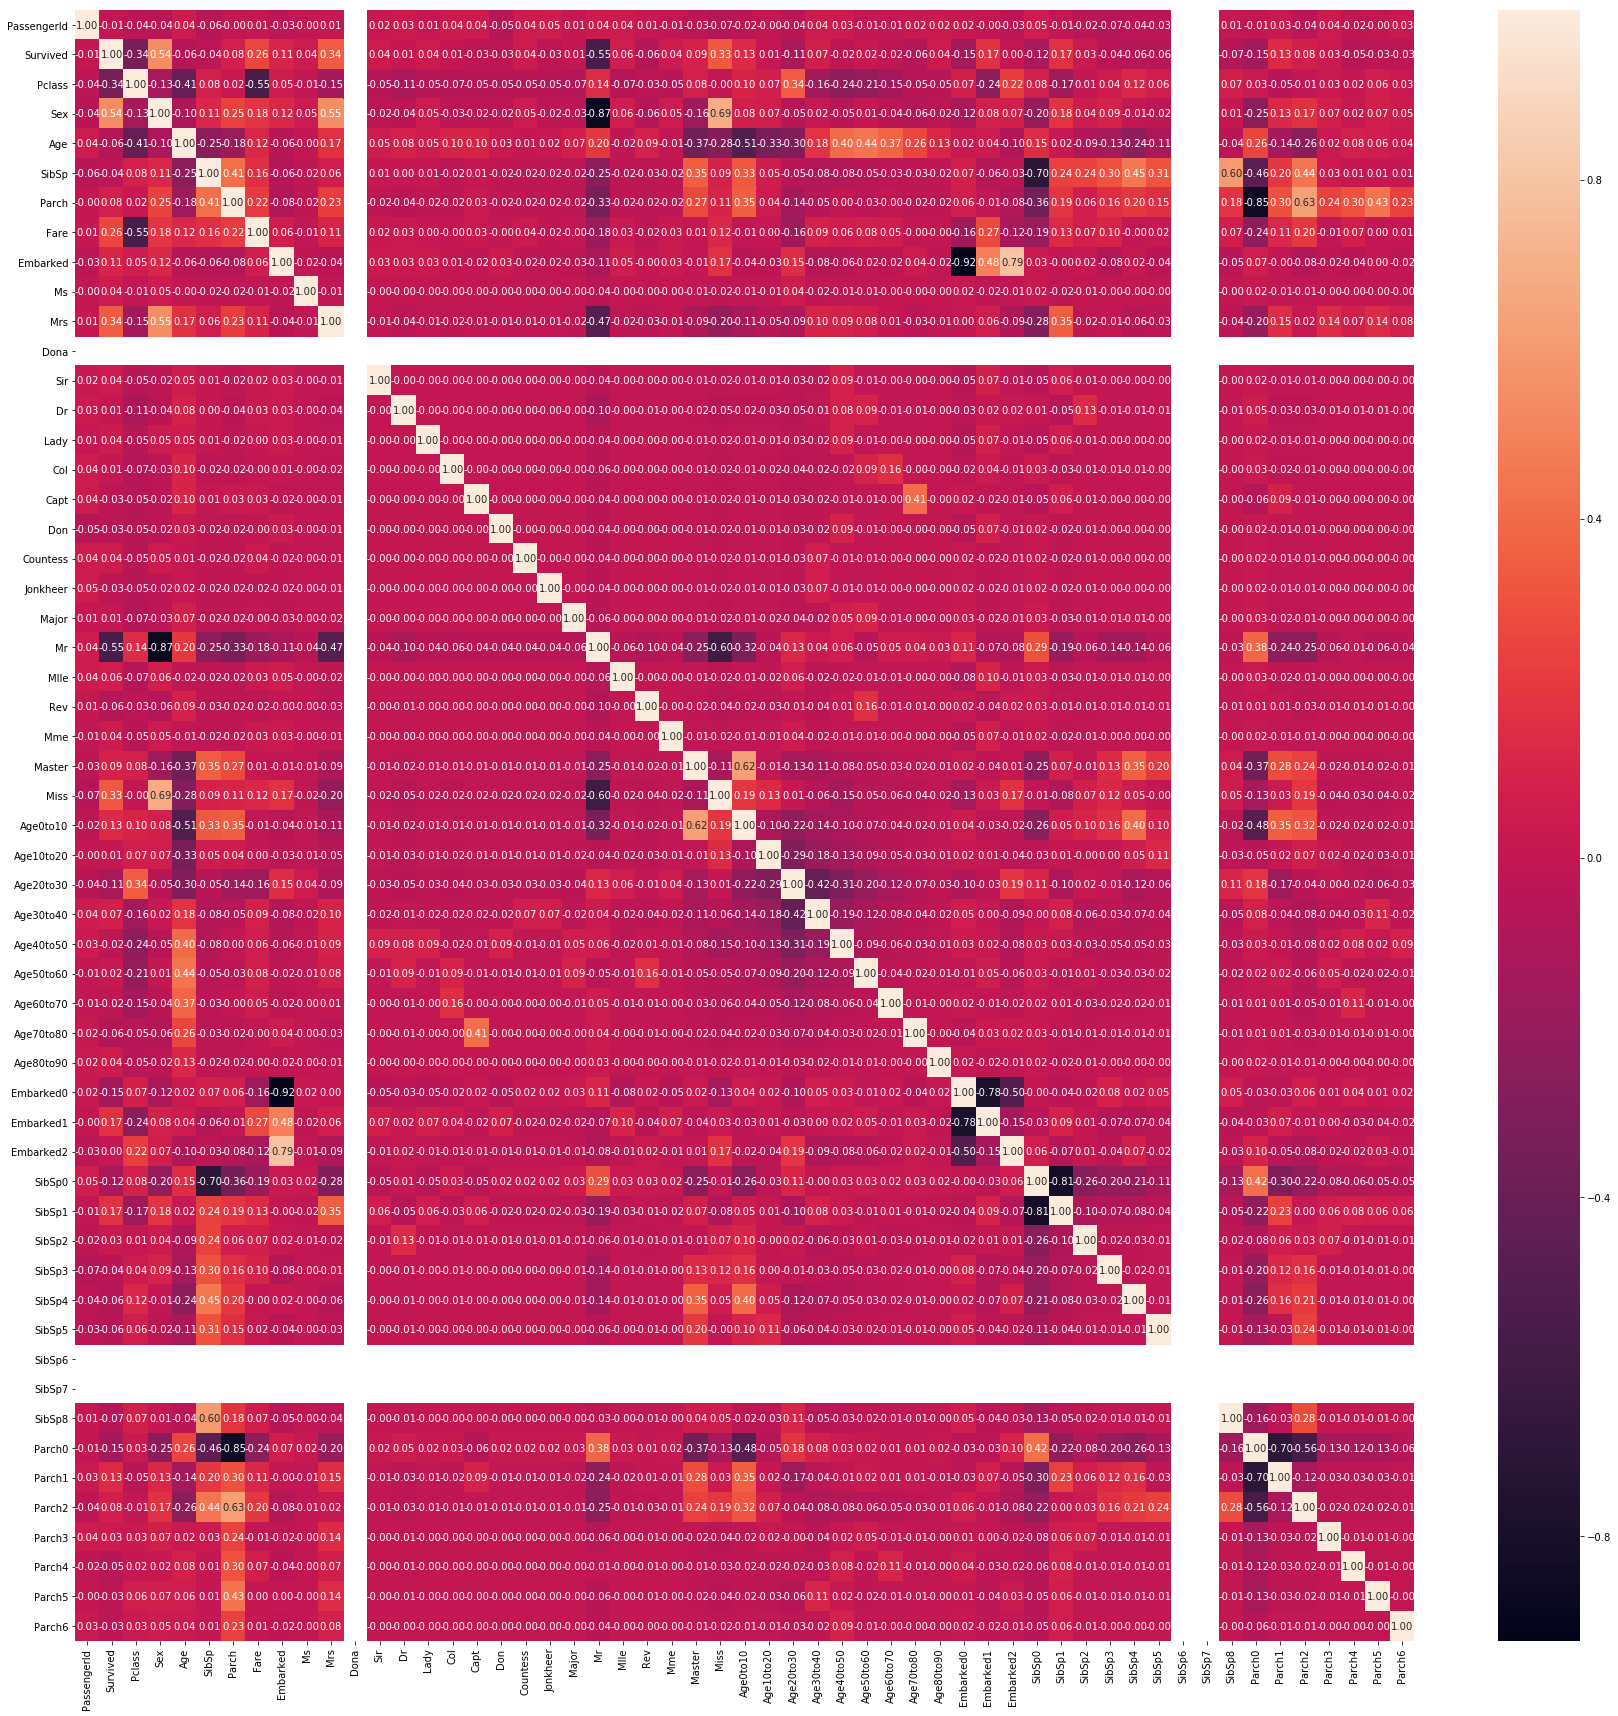

In [25]:
plt.subplots(figsize=(30,30))
sns.heatmap(Combined[0].corr(),annot=True,fmt='0.2f')

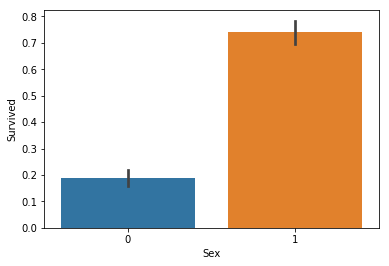

In [26]:
sns.barplot(x="Sex",y="Survived",data=Combined[0])

Clearly, females survived at a much higher rate.  Let's calculate the actual number

In [27]:
Combined[0][["Survived","Sex"]].groupby("Survived").mean()

,Sex
Survived,
0,0.147541
1,0.681287


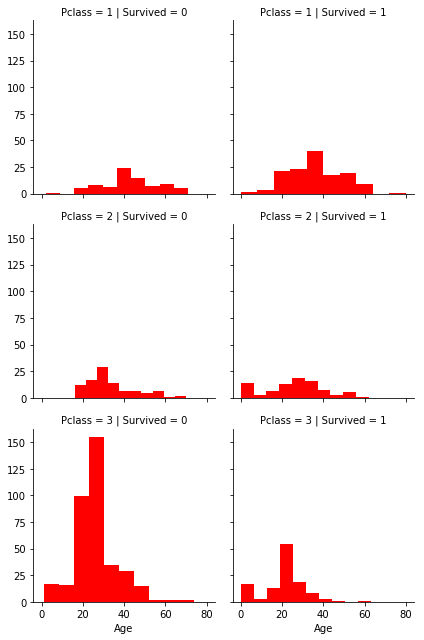

In [28]:
g=sns.FacetGrid(Combined[0],col="Survived",row="Pclass")
g.map(plt.hist,"Age",color='r')

In [29]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ms,...,SibSp6,SibSp7,SibSp8,Parch0,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6
0,1,0,3,0,22,1,0,7.2500,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,1,1,38,1,0,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,1,26,0,0,7.9250,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,1,35,1,0,53.1000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,0,35,0,0,8.0500,0,0,...,0,0,0,1,0,0,0,0,0,0


Since we have a lot of redundant features, we are going to reduce features to only 10.  

In [30]:
X_train.drop("Survived",axis=1,inplace=True)
sb=SelectKBest(chi2,k=10).fit(X_train,Y_train)
X_train_transformed=sb.transform(X_train)
X_test_transformed=sb.transform(X_test)

In [31]:
K=5
kf=KFold(n_splits=K,shuffle=True)
X_train=X_train_transformed
X_test=X_test_transformed
Y_train=Y_train
clf1=LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3=xgb.XGBClassifier(max_depth=3,subsample=0.5, n_estimators=300, learning_rate=0.05)
accuracy=0
for train_index,test_index in kf.split(X_train):
    train_X,test_X=X_train[train_index],X_train[test_index]
    train_Y,test_Y=Y_train[train_index],Y_train[test_index]
    #eclf1 = VotingClassifier(estimators=[('gnb', clf3)], voting='hard')
    eclf1 = VotingClassifier(estimators=[('lr',clf1),('rf', clf2), ('gnb', clf3)], voting='hard')
    eclf2=eclf1.fit(train_X,train_Y)
    Y_pred=eclf2.predict(test_X)
    accuracy=accuracy+sum(Y_pred==test_Y)/len(test_Y)
print(accuracy/5)
eclf1 = VotingClassifier(estimators=[ ('lr',clf1),('rf', clf2), ('gnb', clf3)], voting='hard')
eclf2=eclf1.fit(X_train,Y_train)
Y_pred=eclf2.predict(X_test)

0.820406754127


Now, let's save the prediction in order to submit to Kaggle

In [32]:
datum=pd.DataFrame({'PassengerId':passengers,"Survived":Y_pred})

In [33]:
datum.to_csv('Y.csv',index=False)

Here is another prediction, this time using a simple neural network.  We will be using Keras for this purpose.

In [34]:
X_inputs=Input(shape=(X_train.shape[1],))
X=Dense(25,activation='relu')(X_inputs)
#X=Dense(10,activation='relu')(X)
#X=Dropout(0.5)(X)
#X=Dense(1,activation='relu')(X)
#X=Dense(5,activation='relu')(X)
X=Dense(1)(X)
predictions=Activation('sigmoid')(X)
model=Model(inputs=X_inputs,outputs=predictions)
optim=optimizers.Adam(lr=0.05)
model.compile(loss="binary_crossentropy",optimizer=optim,metrics=['accuracy'])

In [35]:
train_X,test_X,train_Y,test_Y=train_test_split(X_train,Y_train,test_size=0.2,shuffle=True)
model.fit(x=train_X,y=train_Y,epochs=90,batch_size=32)
model.evaluate(test_X,test_Y)

Epoch 1/90
712/712 [==============================] - 0s 623us/step - loss: 1.4098 - acc: 0.6587
Epoch 2/90
712/712 [==============================] - 0s 48us/step - loss: 0.6706 - acc: 0.7360
Epoch 3/90
712/712 [==============================] - 0s 44us/step - loss: 0.5177 - acc: 0.7697
Epoch 4/90
712/712 [==============================] - 0s 48us/step - loss: 0.5165 - acc: 0.7640
Epoch 5/90
712/712 [==============================] - 0s 45us/step - loss: 0.6163 - acc: 0.7289
Epoch 6/90
712/712 [==============================] - 0s 44us/step - loss: 0.5653 - acc: 0.7556
Epoch 7/90
712/712 [==============================] - 0s 48us/step - loss: 0.5198 - acc: 0.7683
Epoch 8/90
712/712 [==============================] - 0s 46us/step - loss: 0.4767 - acc: 0.7851
Epoch 9/90
712/712 [==============================] - 0s 49us/step - loss: 0.4775 - acc: 0.7809
Epoch 10/90
712/712 [==============================] - 0s 51us/step - loss: 0.4762 - acc: 0.7781
Epoch 11/90
712/712 [=================

712/712 [==============================] - 0s 51us/step - loss: 0.4468 - acc: 0.8076
Epoch 86/90
712/712 [==============================] - 0s 44us/step - loss: 0.4748 - acc: 0.7935
Epoch 87/90
712/712 [==============================] - 0s 42us/step - loss: 0.4882 - acc: 0.8048
Epoch 88/90
712/712 [==============================] - 0s 44us/step - loss: 0.4896 - acc: 0.7851
Epoch 89/90
712/712 [==============================] - 0s 42us/step - loss: 0.4677 - acc: 0.8048
Epoch 90/90
179/179 [==============================] - 0s 117us/step


[0.4269439541427783, 0.79329609005144852]

In [36]:
Y_pred2=model.predict(X_test)
Y_pred2[Y_pred2<0.5]=0
Y_pred2[Y_pred2>=0.5]=1
Y_pred2=Y_pred2.astype(int)

In [37]:
datum=pd.DataFrame({'PassengerId':passengers,"Survived":Y_pred2[:,0]})
datum.to_csv('Y2.csv',index=False)

Clearly, we can improve the model by quite a bit, but this is a good start.